In [ ]:
import numpy as np
from numpy import histogram as hist



#Add the Filtering folder, to import the gauss_module.py file, where gaussderiv is defined (needed for dxdy_hist)
import sys, os, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
filteringpath = os.path.join(parentdir, 'Filtering')
sys.path.insert(0,filteringpath)
import gauss_module



#  compute histogram of image intensities, histogram should be normalized so that sum of all values equals 1
#  assume that image intensity varies between 0 and 255
#
#  img_gray - input image in grayscale format
#  num_bins - number of bins in the histogram
def normalized_hist(img_gray, num_bins):
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'


    print(img_gray)


    return hists, bins



#  Compute the *joint* histogram for each color channel in the image
#  The histogram should be normalized so that sum of all values equals 1
#  Assume that values in each channel vary between 0 and 255
#
#  img_color - input color image
#  num_bins - number of bins used to discretize each channel, total number of bins in the histogram should be num_bins^3
#
#  E.g. hists[0,9,5] contains the number of image_color pixels such that:
#       - their R values fall in bin 0
#       - their G values fall in bin 9
#       - their B values fall in bin 5
def rgb_hist(img_color_double, num_bins):
    assert len(img_color_double.shape) == 3, 'image dimension mismatch'
    assert img_color_double.dtype == 'float', 'incorrect image type'


    #... (your code here)


    #Define a 3D histogram  with "num_bins^3" number of entries
    hists = np.zeros((num_bins, num_bins, num_bins))
    
    # Loop for each pixel i in the image 
    for i in range(img_color_double.shape[0]*img_color_double.shape[1]):
        # Increment the histogram bin which corresponds to the R,G,B value of the pixel i
        
        #... (your code here)
        pass


    #Normalize the histogram such that its integral (sum) is equal 1
    #... (your code here)

    #Return the histogram as a 1D vector
    hists = hists.reshape(hists.size)
    return hists



#  Compute the *joint* histogram for the R and G color channels in the image
#  The histogram should be normalized so that sum of all values equals 1
#  Assume that values in each channel vary between 0 and 255
#
#  img_color - input color image
#  num_bins - number of bins used to discretize each channel, total number of bins in the histogram should be num_bins^2
#
#  E.g. hists[0,9] contains the number of image_color pixels such that:
#       - their R values fall in bin 0
#       - their G values fall in bin 9
def rg_hist(img_color_double, num_bins):
    assert len(img_color_double.shape) == 3, 'image dimension mismatch'
    assert img_color_double.dtype == 'float', 'incorrect image type'


    #... (your code here)


    #Define a 2D histogram  with "num_bins^2" number of entries
    hists = np.zeros((num_bins, num_bins))
    
    
    #... (your code here)


    #Return the histogram as a 1D vector
    hists = hists.reshape(hists.size)

    return hists




#  Compute the *joint* histogram of Gaussian partial derivatives of the image in x and y direction
#  Set sigma to 3.0 and cap the range of derivative values is in the range [-6, 6]
#  The histogram should be normalized so that sum of all values equals 1
#
#  img_gray - input gray value image
#  num_bins - number of bins used to discretize each dimension, total number of bins in the histogram should be num_bins^2
#
#  Note: you may use the function gaussderiv from the Filtering exercise (gauss_module.py)
def dxdy_hist(img_gray, num_bins):
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'


    #... (your code here)


    #Define a 2D histogram  with "num_bins^2" number of entries
    hists = np.zeros((num_bins, num_bins))


    #... (your code here)


    #Return the histogram as a 1D vector
    hists = hists.reshape(hists.size)
    return hists



def is_grayvalue_hist(hist_name):
  if hist_name == 'grayvalue' or hist_name == 'dxdy':
    return True
  elif hist_name == 'rgb' or hist_name == 'rg':
    return False
  else:
    assert False, 'unknown histogram type'


def get_hist_by_name(img, num_bins_gray, hist_name):
  if hist_name == 'grayvalue':
    return normalized_hist(img, num_bins_gray)
  elif hist_name == 'rgb':
    return rgb_hist(img, num_bins_gray)
  elif hist_name == 'rg':
    return rg_hist(img, num_bins_gray)
  elif hist_name == 'dxdy':
    return dxdy_hist(img, num_bins_gray)
  else:
    assert False, 'unknown distance: %s'%hist_name



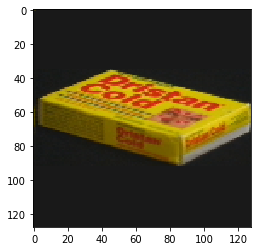

In [212]:
import numpy as np
from numpy import histogram as hist
import imageio
import matplotlib.pyplot as plt

path = r"C:\Users\RE-Giorgio\AML-lab1\Assignment\Identification\query"
path = path + r"\obj1__40.png"
plt.imshow(imageio.imread(path))

In [242]:
img = imageio.imread(path, as_gray = True)
hist_, bins = hist(img, 10)
print(hist_)
print(bins)
#plt.hist(img, bins = bins)

[11833   117   527   718   612   441   623   586   839    88]
[ 17.284     35.5036    53.723198  71.9428    90.1624   108.381996
 126.6016   144.8212   163.0408   181.26039  199.48    ]


In [243]:
def normalized_hist(img_gray, num_bins):
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'

    import numpy as np
    
    flattened = [pix for dim in img_gray for pix in dim]
    min_interval = 0
    max_interval = 255
    
    bin_size = max_interval/num_bins
    bin_hist = {0:0}
    
    previous = 0
    for i in range(num_bins):
        bin_ = previous + bin_size
        bin_hist[bin_] = 0
        previous = bin_

    
    for pix in flattened:
        for bin_ in bin_hist:
            if bin_ - bin_size <= pix < bin_:
                bin_hist[bin_-bin_size] += 1

    hists = list(bin_hist.values())
    hists.pop()
    bins = list(bin_hist.keys())
    return [hists/np.sum(hists)], bins

In [244]:
normalized_hist(np.array(img, "float"), 10)

([array([0.62976074, 0.09863281, 0.04443359, 0.06091309, 0.03723145,
         0.05133057, 0.07012939, 0.00756836, 0.        , 0.        ])],
 [0, 25.5, 51.0, 76.5, 102.0, 127.5, 153.0, 178.5, 204.0, 229.5, 255.0])

In [246]:
img = imageio.imread(path)

In [247]:
def rgb_hist(img_color_double, num_bins):
    assert len(img_color_double.shape) == 3, 'image dimension mismatch'
    assert img_color_double.dtype == 'float', 'incorrect image type'

    import numpy as np
    
    min_interval = 0
    max_interval = 255
    flattened = [pix for dim in img_color_double for pix in dim]
    bin_size = max_interval/num_bins
    
    bins = [0 for _ in range(num_bins+1)]
    previous = 0
    for i in range(num_bins):
        bin_ = previous + bin_size
        bins[i+1] = bin_
        previous = bin_

    #Define a 3D histogram  with "num_bins^3" number of entries
    hists = np.zeros((num_bins, num_bins, num_bins))
    # Loop for each pixel i in the image 
    for i in range(img_color_double.shape[0]*img_color_double.shape[1]):
        # Increment the histogram bin which corresponds to the R,G,B value of the pixel i
            rgb = [0,0,0]
            for k in range(len(bins)):
                if bins[k-1] <= flattened[i][0] < bins[k]:
                    rgb[0] = k-1
                if bins[k-1] <= flattened[i][1] < bins[k]:
                    rgb[1] = k-1
                if bins[k-1] <= flattened[i][2] < bins[k]:
                    rgb[2] = k-1
                    
            hists[rgb[0],rgb[1],rgb[2]] += 1

    #Normalize the histogram such that its integral (sum) is equal 1
    hists = hists/np.sum(hists)
    #Return the histogram as a 1D vector
    hists = hists.reshape(hists.size)
    return hists

In [248]:
rgb_hist(np.array(img, "float"), 10)

array([6.10107422e-01, 3.17382812e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.59301758e-02, 1.39160156e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [249]:
#  Compute the *joint* histogram for the R and G color channels in the image
#  The histogram should be normalized so that sum of all values equals 1
#  Assume that values in each channel vary between 0 and 255
#
#  img_color - input color image
#  num_bins - number of bins used to discretize each channel, total number of bins in the histogram should be num_bins^2
#
#  E.g. hists[0,9] contains the number of image_color pixels such that:
#       - their R values fall in bin 0
#       - their G values fall in bin 9
def rg_hist(img_color_double, num_bins):
    assert len(img_color_double.shape) == 3, 'image dimension mismatch'
    assert img_color_double.dtype == 'float', 'incorrect image type'

    import numpy as np
    
    min_interval = 0
    max_interval = 255
    flattened = [pix for dim in img_color_double for pix in dim]
    bin_size = max_interval/num_bins
    
    bins = [0 for _ in range(num_bins+1)]
    previous = 0
    for i in range(num_bins):
        bin_ = previous + bin_size
        bins[i+1] = bin_
        previous = bin_


    #Define a 2D histogram  with "num_bins^2" number of entries
    hists = np.zeros((num_bins, num_bins))
    
    
    for i in range(img_color_double.shape[0]*img_color_double.shape[1]):
        # Increment the histogram bin which corresponds to the R,G,B value of the pixel i
        rg = [0,0]
        for k in range(len(bins)):
            if bins[k-1] <= flattened[i][0] < bins[k]:
                rg[0] = k-1
            if bins[k-1] <= flattened[i][1] < bins[k]:
                rg[1] = k-1
                    
        hists[rg[0],rg[1]] += 1
    #Normalize the histogram such that its integral (sum) is equal 1
    hists = hists/np.sum(hists)
    #Return the histogram as a 1D vector
    hists = hists.reshape(hists.size)

    return hists

In [250]:
rg_hist(np.array(img, "float"), 10)

array([6.13281250e-01, 2.98461914e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.73730469e-03, 7.67211914e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.44140625e-03, 5.24902344e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.27246094e-04,
       2.34985352e-02, 8.05664062e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.51660156e-03, 8.54492188e-03, 2.42309570e-02,
       5.92041016e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.50244141e-03, 2.62451172e-03, 1.09863281e-02, 1.06811523e-02,
      

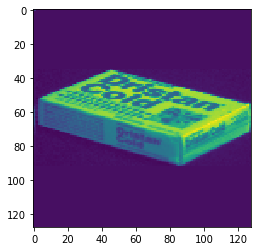

In [251]:
from skimage import color
from skimage import io

img = color.rgb2gray(io.imread(path))
plt.imshow(img)

In [252]:
""
def gaussdx(sigma):

    sig2=sigma**2
    
    x=list(map(round,np.arange(-3*(sig2), 3*(sig2)+1))) #define the range
    
    Dx= [-(el/sig2) * (np.exp(-0.5*((el*el)/sig2))) for el in x] #find derivative gaussian values
    Dx= Dx/sum(Dx) #normalize
    
    return Dx, x

def gaussderiv(img, sigma):

    [Dx, pos] = gaussdx(sigma) #get gaussian kernel
    
    imgDx=np.apply_along_axis(func1d=lambda x: np.convolve(x, Dx, "same"),axis=0, arr=img) #apply to all rows
    imgDy=np.apply_along_axis(func1d=lambda x: np.convolve(x, Dx, "same"),axis=1, arr=img) #apply to all columns


    
    return imgDx, imgDy

In [253]:
gaussderiv(img, 3)

(array([[-2.45489199e+15, -2.45489199e+15, -2.45489199e+15, ...,
         -2.45489199e+15, -2.45489199e+15, -2.45489199e+15],
        [-1.93341690e+15, -1.94994197e+15, -2.19444146e+15, ...,
         -2.19444146e+15, -2.19444146e+15, -2.19444146e+15],
        [-1.31160320e+15, -1.33957953e+15, -1.75350824e+15, ...,
         -1.75350824e+15, -1.75350824e+15, -1.75350824e+15],
        ...,
        [ 1.75350824e+15,  1.75350824e+15,  1.75350824e+15, ...,
          1.75350824e+15,  1.75350824e+15,  1.75350824e+15],
        [ 2.19444146e+15,  2.19444146e+15,  2.19444146e+15, ...,
          2.19444146e+15,  2.19444146e+15,  2.19444146e+15],
        [ 2.45489199e+15,  2.45489199e+15,  2.45489199e+15, ...,
          2.45489199e+15,  2.45489199e+15,  2.45489199e+15]]),
 array([[-2.69939148e+15, -1.93341690e+15, -1.06710371e+15, ...,
          1.75350824e+15,  2.19444146e+15,  2.45489199e+15],
        [-2.45489199e+15, -2.19444146e+15, -1.75350824e+15, ...,
          1.75350824e+15,  2.19444146e

In [265]:
#  Compute the *joint* histogram of Gaussian partial derivatives of the image in x and y direction
#  Set sigma to 3.0 and cap the range of derivative values is in the range [-6, 6]
#  The histogram should be normalized so that sum of all values equals 1
#
#  img_gray - input gray value image
#  num_bins - number of bins used to discretize each dimension, total number of bins in the histogram should be num_bins^2
#
#  Note: you may use the function gaussderiv from the Filtering exercise (gauss_module.py)
def dxdy_hist(img_gray, num_bins):
    assert len(img_gray.shape) == 2, 'image dimension mismatch'
    assert img_gray.dtype == 'float', 'incorrect image type'


    derivx, derivy = gaussderiv(img, 3)
    derivx = np.clip(derivx, -6, 6)
    derivy = np.clip(derivy, -6, 6) 
        
    min_interval = -6
    max_interval = 6
    stacked = np.array(list(zip(derivx.reshape(-1), derivy.reshape(-1))))
    bin_size = (max_interval - min_interval)/num_bins
    
    bins = [-6 for _ in range(num_bins+1)]
    previous = -6
    for i in range(num_bins):
        bin_ = previous + bin_size
        bins[i+1] = bin_
        previous = bin_
    #Define a 2D histogram  with "num_bins^2" number of entries
    hists = np.zeros((num_bins, num_bins))
    

    for i in range(derivx.shape[0]):
        # Increment the histogram bin which corresponds to the R,G,B value of the pixel i 
        deriv_xy = [0,0]
        for k in range(len(bins)):
            if bins[k-1] <= stacked[i][0] < bins[k]:
                deriv_xy[0] = k-1
            if bins[k-1] <= stacked[i][1] < bins[k]:
                deriv_xy[1] = k-1
                    
            hists[deriv_xy[0],deriv_xy[1]] += 1
    
    hists = hists/np.sum(hists)
    #Return the histogram as a 1D vector
    hists = hists.reshape(hists.size)
    return hists


In [266]:
dxdy_hist(np.array(img, "float"),10)

array([0.69602273, 0.        , 0.        , 0.        , 0.        ,
       0.26988636, 0.        , 0.        , 0.        , 0.03409091,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     